# Regresion Lineal parte 2

## Regularizacion

In [1]:
# Dataset
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=200, n_features=1, n_informative=1,
                       noise = 15.0, random_state=1)

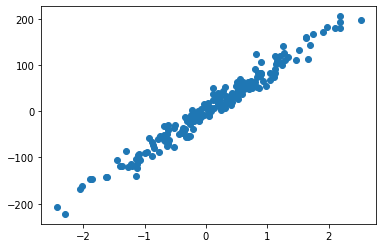

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

### 1. Regresion Ridge

In [3]:
from sklearn.linear_model import Ridge
ridge = Ridge(1)

In [4]:
ridge.fit(X,Y)
ridge.score(X,Y)

0.966476827861293

Busqueda del valor optimo

In [5]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=(0.01,0.1,0.2,0.5,1.0,2.0,5.0,10.0))

In [6]:
ridge_cv.fit(X,Y)
ridge_cv.score(X,Y)

0.966511282919938

In [7]:
# Cual es el alpha optimo
ridge_cv.alpha_

0.1

### 2. Regresion Lasso

In [8]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

In [9]:
lasso.fit(X,Y)
lasso.score(X,Y)

0.9665097823763047

In [10]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=(0.01,0.05,0.1,0.5,1.0,2.0,5.0,10.0))

In [11]:
lasso_cv.fit(X,Y)
lasso_cv.score(X,Y)

0.9665116162555911

### 3. ElasticNet

In [14]:
from sklearn.linear_model import ElasticNetCV
en_cv = ElasticNetCV(alphas=(0.01,0.05,0.1,0.5,1.0,2.0,5.0,10.0), l1_ratio=(0.01,0.05,0.1,0.5,0.8))

In [15]:
en_cv.fit(X,Y)
en_cv.score(X,Y)

0.9665054990351233

In [16]:
print("Alpha:", en_cv.alpha_)
print("l1 ratio;", en_cv.l1_ratio_)

Alpha: 0.01
l1 ratio; 0.8


## Regresion robusta

In [17]:
# Dataset
import numpy as np
X1 = np.linspace(0, 8, 200)
X2 = np.linspace(8, 10, 25)
Y1 = 3*X1 + 2 + np.random.uniform(-1.0,1.0,200)
Y2 = 5*X2 + 1 + np.random.uniform(-5.0,5.0,25)

X = np.concatenate([X1,X2])
Y = np.concatenate([Y1,Y2])

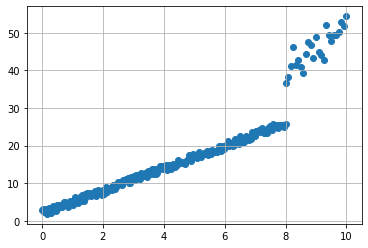

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.grid('on')
plt.show()

In [19]:
# Regresion lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
X_train = np.reshape(X,(-1,1))
Y_train = np.reshape(Y,(-1,1))

In [21]:
lr.fit(X_train, Y_train)

LinearRegression()

In [22]:
m = lr.coef_[0]
b = lr.intercept_

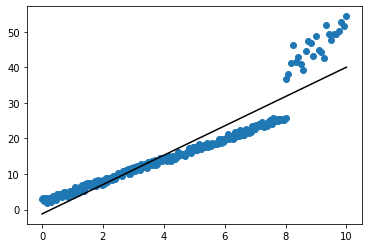

In [23]:
plt.scatter(X,Y)
plt.plot([0,10],[b, 10*m+b],'k')
plt.show()

### 1. Regresion RANSAC

In [24]:
from sklearn.linear_model import RANSACRegressor
rr = RANSACRegressor()

In [25]:
rr.fit(X_train,Y_train)

RANSACRegressor()

In [26]:
m2= rr.estimator_.coef_[0]
b2 = rr.estimator_.intercept_

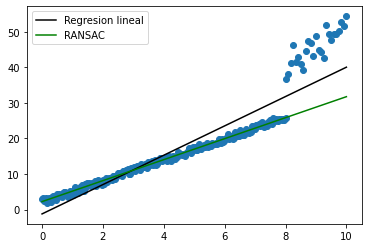

In [28]:
plt.scatter(X,Y)
plt.plot([0,10],[b, 10*m+b],'k')
plt.plot([0,10],[b2, 10*m2+b2],'g')
plt.legend(['Regresion lineal','RANSAC'])
plt.show()

### 2. Regresion Huber

In [34]:
# Dataset
X = np.linspace(0,10,250)
Y = 2*X+3
Y = Y + (np.random.uniform(0,10,250)>8)*np.random.uniform(0,10,250)
Y = Y + np.random.uniform(-1,1,250)

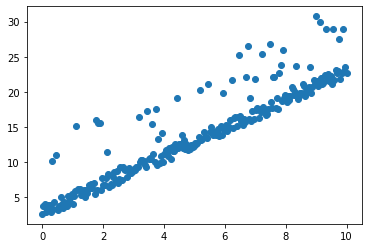

In [35]:
plt.scatter(X,Y)
plt.show()

In [36]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()

In [38]:
hr.fit(X.reshape((-1,1)),Y)

HuberRegressor()

In [39]:
m = hr.coef_[0]
b = hr.intercept_

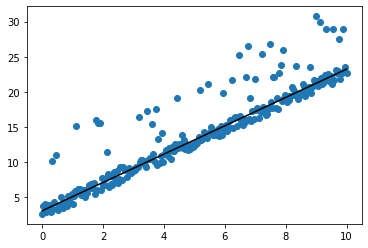

In [41]:
plt.scatter(X,Y)
plt.plot([0,10],[b, 10*m+b],'k')
plt.show()

## Regresion isotonica

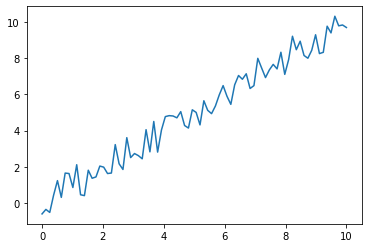

In [43]:
# Dataset
X = np.linspace(0,10,80)
Y = X + np.random.uniform(-1,1,80)
plt.plot(X,Y)
plt.show()

In [44]:
from sklearn.isotonic import IsotonicRegression
y_min = -1
y_max = 12
ir = IsotonicRegression(y_min=y_min, y_max=y_max)

In [45]:
ir.fit(X.reshape((-1,1)),Y)

IsotonicRegression(y_max=12, y_min=-1)

In [46]:
Y_predict = ir.predict(X.reshape((-1,1)))

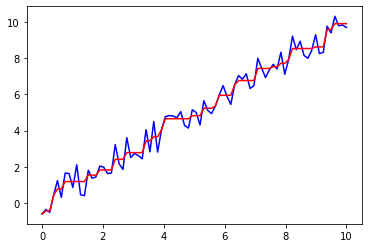

In [47]:
plt.plot(X,Y,'b')
plt.plot(X,Y_predict,'r')
plt.show()